In [57]:
import re 
import string
import tabula
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

In [58]:
porter = PorterStemmer()
lemmatizer = WordNetLemmatizer()

In [59]:
with open('72382f2c98567b30ebf223f25cfb715c1f28.txt') as f:
    clean = f.read().splitlines()

In [60]:
clean

['International Journal of Innovative',
 'Computing, Information and Control',
 'Volume 7, Number 10, October 2011',
 '',
 'c',
 'ICIC International ⃝2011',
 'ISSN 1349-4198',
 'pp. 5839–5850',
 '',
 'FEED-FORWARD NEURAL NETWORKS TRAINING: A',
 'COMPARISON BETWEEN GENETIC ALGORITHM AND',
 'BACK-PROPAGATION LEARNING ALGORITHM',
 'Zhen-Guo Che1 , Tzu-An Chiang2 and Zhen-Hua Che3,∗',
 '1',
 '',
 'Institute of Information Management',
 'National Chiao Tung University',
 'No. 1001, University Rd., Hsinchu 300, Taiwan',
 'bcc102a@hotmail.com',
 '2',
 '',
 'Department of Business Administration',
 'National Taipei College of Business',
 'No. 321, Sec. 1, Jinan Rd., Taipei 100, Taiwan',
 'phdchiang@gmail.com',
 '3',
 '',
 'Department of Industrial Engineering and Management',
 'National Taipei University of Technology',
 'No. 1, Sec. 3, Chung-Hsiao E. Rd., Taipei 106, Taiwan',
 '∗',
 'Corresponding author: zhche@ntut.edu.tw',
 '',
 'Received March 2010; revised July 2010',
 'Abstract. This stu

In [67]:
shear = [re.sub(r"[^\w\d'\s]+", "", s) for s in clean] # get rid of punctuation
shear = [porter.stem(word) for word in shear]
shear = [lemmatizer.lemmatize(word) for word in shear]

shears = [x for x in shear if x != ' ']
shearss = [x for x in shears if x != '']

In [68]:
shear

['international journal of innov',
 'computing information and control',
 'volume 7 number 10 october 2011',
 '',
 'c',
 'icic international 2011',
 'issn 13494198',
 'pp 58395850',
 '',
 'feedforward neural networks training a',
 'comparison between genetic algorithm and',
 'backpropagation learning algorithm',
 'zhenguo che1  tzuan chiang2 and zhenhua che3',
 '1',
 '',
 'institute of information manag',
 'national chiao tung univers',
 'no 1001 university rd hsinchu 300 taiwan',
 'bcc102ahotmailcom',
 '2',
 '',
 'department of business administr',
 'national taipei college of busi',
 'no 321 sec 1 jinan rd taipei 100 taiwan',
 'phdchianggmailcom',
 '3',
 '',
 'department of industrial engineering and manag',
 'national taipei university of technolog',
 'no 1 sec 3 chunghsiao e rd taipei 106 taiwan',
 '',
 'corresponding author zhchentutedutw',
 '',
 'received march 2010 revised july 2010',
 'abstract this study discusses the advantages and characteristics of the genetic algorithm and

In [69]:
shears

['international journal of innov',
 'computing information and control',
 'volume 7 number 10 october 2011',
 '',
 'c',
 'icic international 2011',
 'issn 13494198',
 'pp 58395850',
 '',
 'feedforward neural networks training a',
 'comparison between genetic algorithm and',
 'backpropagation learning algorithm',
 'zhenguo che1  tzuan chiang2 and zhenhua che3',
 '1',
 '',
 'institute of information manag',
 'national chiao tung univers',
 'no 1001 university rd hsinchu 300 taiwan',
 'bcc102ahotmailcom',
 '2',
 '',
 'department of business administr',
 'national taipei college of busi',
 'no 321 sec 1 jinan rd taipei 100 taiwan',
 'phdchianggmailcom',
 '3',
 '',
 'department of industrial engineering and manag',
 'national taipei university of technolog',
 'no 1 sec 3 chunghsiao e rd taipei 106 taiwan',
 '',
 'corresponding author zhchentutedutw',
 '',
 'received march 2010 revised july 2010',
 'abstract this study discusses the advantages and characteristics of the genetic algorithm and

In [70]:
shearss

['international journal of innov',
 'computing information and control',
 'volume 7 number 10 october 2011',
 'c',
 'icic international 2011',
 'issn 13494198',
 'pp 58395850',
 'feedforward neural networks training a',
 'comparison between genetic algorithm and',
 'backpropagation learning algorithm',
 'zhenguo che1  tzuan chiang2 and zhenhua che3',
 '1',
 'institute of information manag',
 'national chiao tung univers',
 'no 1001 university rd hsinchu 300 taiwan',
 'bcc102ahotmailcom',
 '2',
 'department of business administr',
 'national taipei college of busi',
 'no 321 sec 1 jinan rd taipei 100 taiwan',
 'phdchianggmailcom',
 '3',
 'department of industrial engineering and manag',
 'national taipei university of technolog',
 'no 1 sec 3 chunghsiao e rd taipei 106 taiwan',
 'corresponding author zhchentutedutw',
 'received march 2010 revised july 2010',
 'abstract this study discusses the advantages and characteristics of the genetic algorithm and backpropagation neural network to 

In [71]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
import pandas as pd
import numpy as np
%pylab
%matplotlib inline

Using matplotlib backend: Qt5Agg
Populating the interactive namespace from numpy and matplotlib


/home/nyjoey/anaconda3/lib/python3.6/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['f']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [72]:
vect = TfidfVectorizer(ngram_range=(1,1),stop_words='english')

In [73]:
dtm = vect.fit_transform(shearss)

In [74]:
dtm

<1042x1608 sparse matrix of type '<class 'numpy.float64'>'
	with 3547 stored elements in Compressed Sparse Row format>

In [75]:
pd.DataFrame(dtm.toarray(),columns=vect.get_feature_names())

,001,00143,00153,00154,00155,00158,00159,00160,00182,00184,...,zhang,zhchentutedutw,zhenguo,zhenhua,zhou,αwji,δil1,δjl,δkl,ηδjl1
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0


In [76]:
lda = LatentDirichletAllocation(n_components=30)

In [77]:
lda_dtf = lda.fit_transform(dtm)

/home/nyjoey/anaconda3/lib/python3.6/site-packages/sklearn/decomposition/online_lda.py:532: DeprecationWarning: The default value for 'learning_method' will be changed from 'online' to 'batch' in the release 0.20. This warning was introduced in 0.18.
  DeprecationWarning)


In [78]:
import numpy as np
sorting=np.argsort(lda.components_)[:,::-1]
features=np.array(vect.get_feature_names())

In [79]:
import mglearn
mglearn.tools.print_topics(topics=range(5), feature_names=features,
sorting=sorting, topics_per_chunk=5, n_words=10)

topic 0       topic 1       topic 2       topic 3       topic 4       
--------      --------      --------      --------      --------      
2000          science       09            ga            001           
00615         technology    5850          rate          mse           
00159         no1           1993          mutation      time          
step          vol38         ca            data          algorithm     
5847          pp143147      function      crossover     genetic       
05272         2007          12            table         test          
00561         yuan          sin           bpla          10            
00557         guo           05617         460           meng          
682           36            00540         train         multiagent    
1232          improv        00724         06834         ye            




In [80]:
topic1 = np.argsort(lda_dtf[:,4])[::-1]
for i in topic1[:10]:
     print(shearss[i] + "\n")

41 a meng l ye d roy and p padilla genetic algorithm based multiagent system applied to test

12 m l huang and y h hung combining radial basis function neural network and genetic algorithm

10 h s chung and j j alonso multiobjective optimization using approximation modelbased genet

training mse 00401 00388 00363 00319 00189 00202

step 2 calculate the fitness values fitness function is set up to perform the evolutionari

acknowledgement this work is partially supported by the national science council

of 0 fmin  rrand is deducted by the fitness function value in the popul

however fnns often end up being over trained they adopt trialsanderrors to seek

analyses finally conclusions are given in section 6

testing mse 00504 00549 00575 00517 00522 00523



In [81]:
topic2 = np.argsort(lda_dtf[:,3])[::-1]
for i in topic2[:10]:
    print(shearss[i] + "\n")

two types there are a total of 768 data entries 460 training entries 154 test entri

words they do not use diﬀerent data types to train and compare a ga and bpla

iris plants there are a total of 150 data entries data is divided into the follow

quality the current methods bpla and ga will be improved by introducing the loc

table 13 experiments of crossover rate and mutation rate for the ga in diabet

step 4 cross individuals two individuals are selected randomly from the mating pool

is minimized the averages are aggregated and compared as shown in table 5 table 5

step 1 normalize the data the obtained data is mapped to the bound 0 1 so as to

table 8 experiments of crossover rate and mutation rate for the ga in

table 3 experiments of crossover rate and mutation rate for the ga in



In [82]:
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

In [83]:
d = path.dirname(__name__)

In [91]:
text = open(path.join(d, '72382f2c98567b30ebf223f25cfb715c1f28.txt')).read()

In [92]:
stopwords = set(STOPWORDS)

In [93]:
wc = WordCloud(background_color="black", max_words=2000, stopwords=stopwords)

In [94]:
wc.generate(text)

In [95]:
wc.to_file(path.join(d, "cloud.png"))

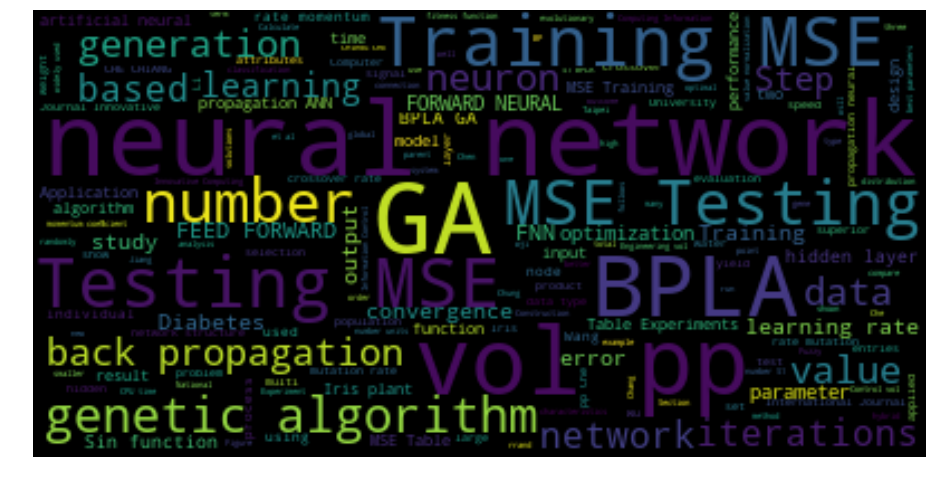

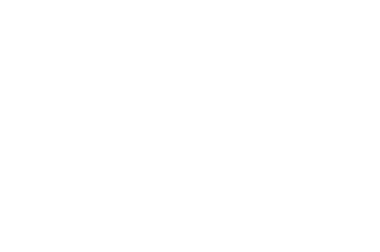

In [96]:
plt.figure(figsize=(16,13))
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.figure()
plt.axis("off")
plt.show()